<a href="https://colab.research.google.com/github/Nikhilbablu/Nikhilbablu/blob/Nikhil/Assignment_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Assignment 5 Part 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load the Titanic Ship Passengers dataset into a dataframe
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
df = pd.read_csv(url)

# 2. Check the data types of each feature(column) in the dataset
print("Data Types of Each Feature:\n", df.dtypes)

Data Types of Each Feature:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [7]:
# 3. Generate a summary of the dataset (min, max, stddev, quartile values)
summary = df.describe(percentiles=[.25, .5, .75, .9])
print("\nSummary of the Dataset:\n", summary)


Summary of the Dataset:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
90%     802.000000    1.000000    3.000000   50.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
90%      2.000000

In [8]:
# 4. List the names of columns/features in the dataset
print("\nColumns/Features in the Dataset:\n", df.columns)


Columns/Features in the Dataset:
 Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


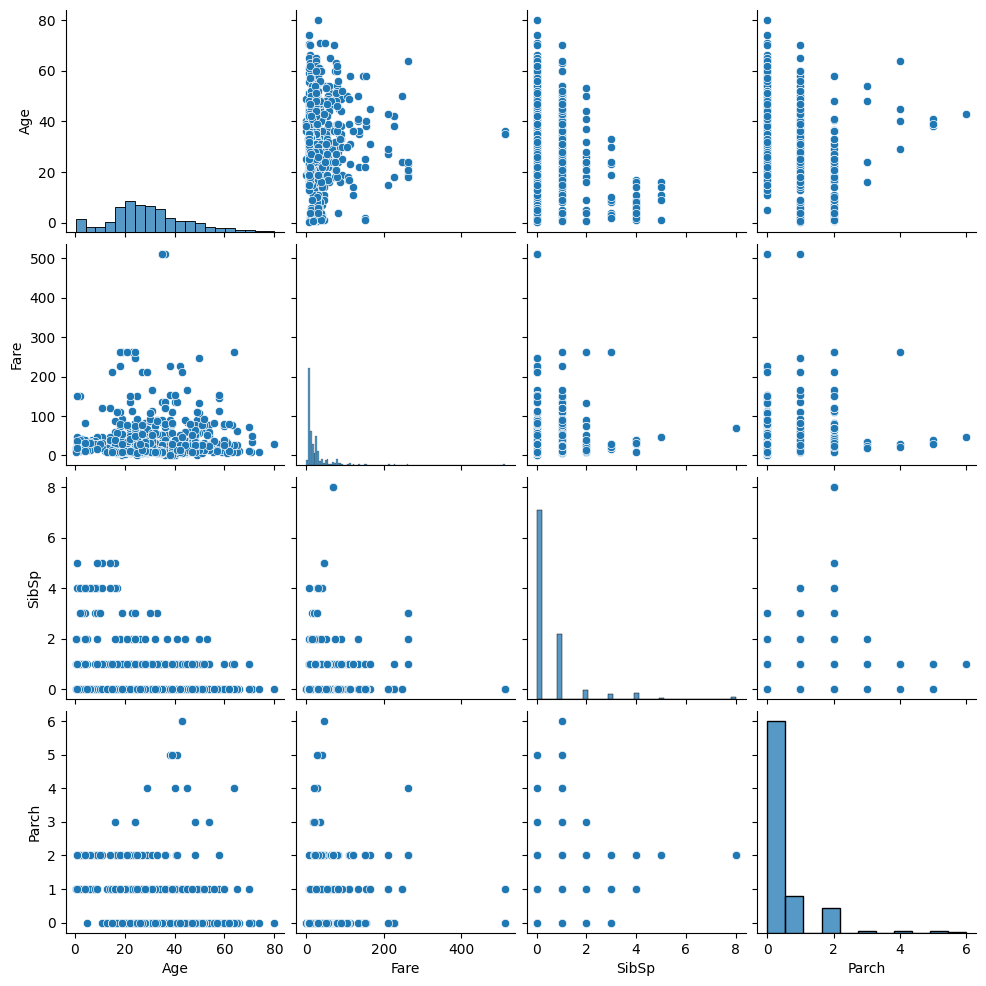

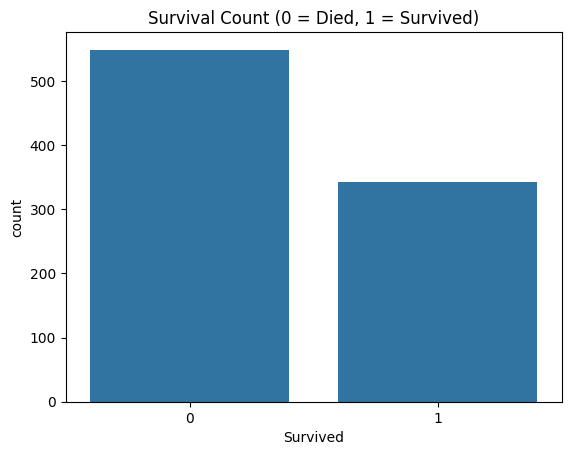

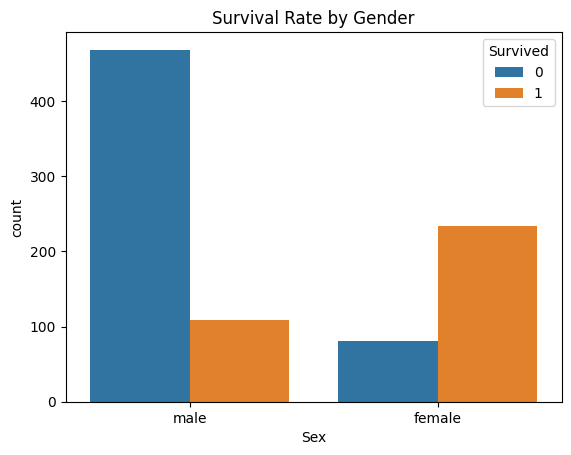

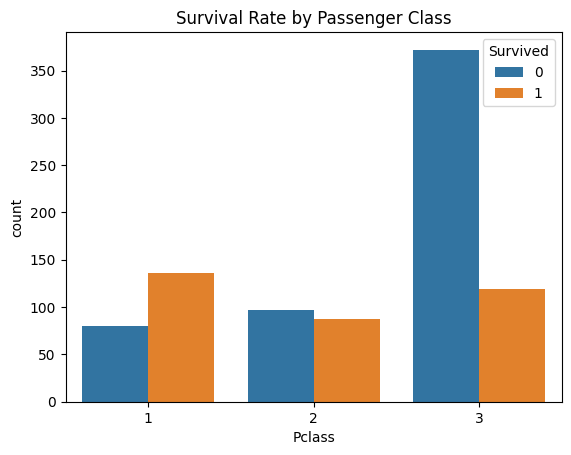

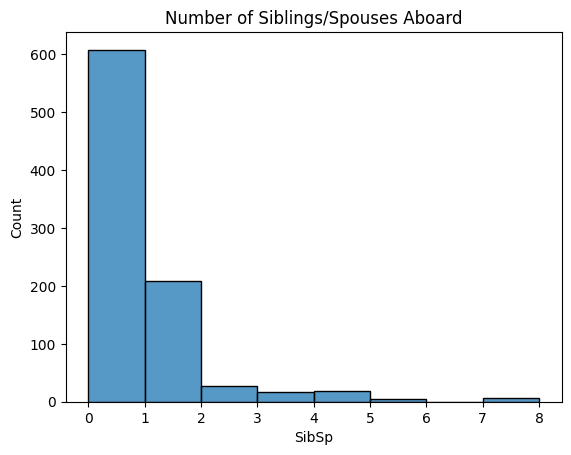

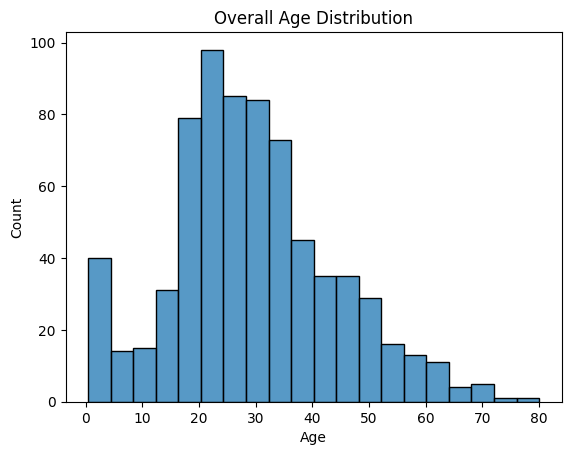

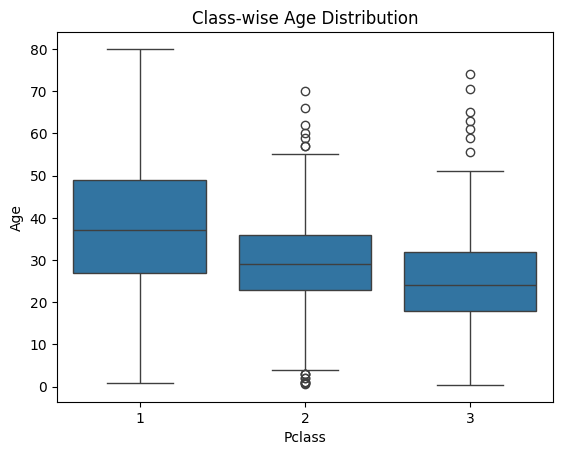

In [5]:
# 5. Perform Exploratory Analysis

# a) Numeric Features Plot
sns.pairplot(df[['Age', 'Fare', 'SibSp', 'Parch']])
plt.show()

# b) Check relative size of survived/unsurvived
sns.countplot(data=df, x='Survived')
plt.title("Survival Count (0 = Died, 1 = Survived)")
plt.show()

# c) Check if any pattern on gender
sns.countplot(data=df, x='Sex', hue='Survived')
plt.title("Survival Rate by Gender")
plt.show()

# d) Passenger class-wise survival rate
sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title("Survival Rate by Passenger Class")
plt.show()

# e) SibSp distribution (siblings/spouses)
sns.histplot(df['SibSp'], kde=False, bins=8)
plt.title("Number of Siblings/Spouses Aboard")
plt.show()

# f) Overall Age distribution
sns.histplot(df['Age'].dropna(), kde=False, bins=20)
plt.title("Overall Age Distribution")
plt.show()

# g) Class-wise age distribution
sns.boxplot(data=df, x='Pclass', y='Age')
plt.title("Class-wise Age Distribution")
plt.show()

In [9]:
# 6. Perform Data Wrangling

# a) Impute missing Age data with median value
df['Age'].fillna(df['Age'].median(), inplace=True)

# b) Drop unnecessary features: 'PassengerId', 'Name', 'Ticket', 'Cabin'
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

# c) Recode categorical features ('Sex', 'Embarked') to numerical values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [10]:
# 7. Build Logistic Regression Model

# Define independent variables (features) and target (Survived)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Logistic Regression model
logreg = LogisticRegression(max_iter=200)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)


In [11]:
# 8. Evaluate the Model

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", conf_matrix)

# Classification Report
class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)


Accuracy: 0.8101

Confusion Matrix:
 [[90 15]
 [19 55]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

